<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Advanced_SGD_Momentum_NAG_Visualization(Numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Visualization of SGD, Momentum, and NAG
Includes:
- Optimization animation 🎥
- Convergence speed comparison 📉
- Rosenbrock function optimization 🧠
- Climate dataset loading
- Effect of epochs visualization


In [2]:
# Extract climate dataset
import zipfile
import os

zip_path = '/content/daily-climate-time-series-data.zip'
extract_path = './climate_data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['DailyDelhiClimateTrain.csv', 'DailyDelhiClimateTest.csv']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd

In [4]:
# Try loading a CSV file from extracted dataset
csv_files = []
for root, dirs, files in os.walk('./climate_data'):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if csv_files:
    df = pd.read_csv(csv_files[0])
    print('Loaded:', csv_files[0])
    df.head()
else:
    print('No CSV found, continuing with synthetic optimization demo.')

Loaded: ./climate_data/DailyDelhiClimateTrain.csv


In [5]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def grad_rosenbrock(x, y):
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])

In [6]:
def sgd(start, lr=0.001, steps=50):
    x = np.array(start, dtype=float)
    path = [x.copy()]
    losses = [rosenbrock(x[0], x[1])]
    for _ in range(steps):
        grad = grad_rosenbrock(x[0], x[1])
        x = x - lr * grad
        path.append(x.copy())
        losses.append(rosenbrock(x[0], x[1]))
    return np.array(path), np.array(losses)

def momentum(start, lr=0.001, beta=0.9, steps=50):
    x = np.array(start, dtype=float)
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [rosenbrock(x[0], x[1])]
    for _ in range(steps):
        grad = grad_rosenbrock(x[0], x[1])
        v = beta * v + lr * grad
        x = x - v
        path.append(x.copy())
        losses.append(rosenbrock(x[0], x[1]))
    return np.array(path), np.array(losses)

def nag(start, lr=0.001, beta=0.9, steps=50):
    x = np.array(start, dtype=float)
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [rosenbrock(x[0], x[1])]
    for _ in range(steps):
        lookahead = x - beta * v
        grad = grad_rosenbrock(lookahead[0], lookahead[1])
        v = beta * v + lr * grad
        x = x - v
        path.append(x.copy())
        losses.append(rosenbrock(x[0], x[1]))
    return np.array(path), np.array(losses)

In [7]:
start = [-1.5, 1.5]
path_sgd, loss_sgd = sgd(start)
path_mom, loss_mom = momentum(start)
path_nag, loss_nag = nag(start)

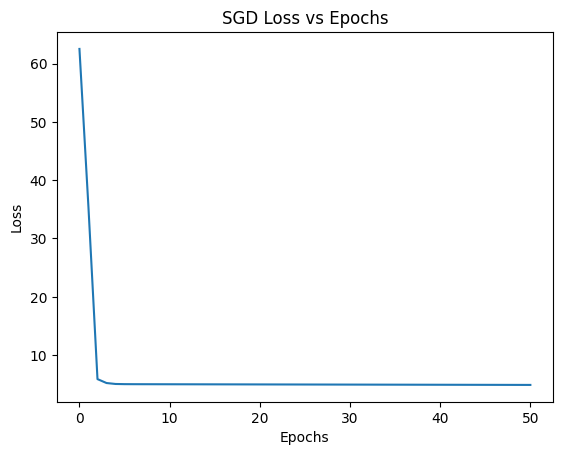

In [8]:
# SGD convergence
plt.figure()
plt.plot(loss_sgd)
plt.title('SGD Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

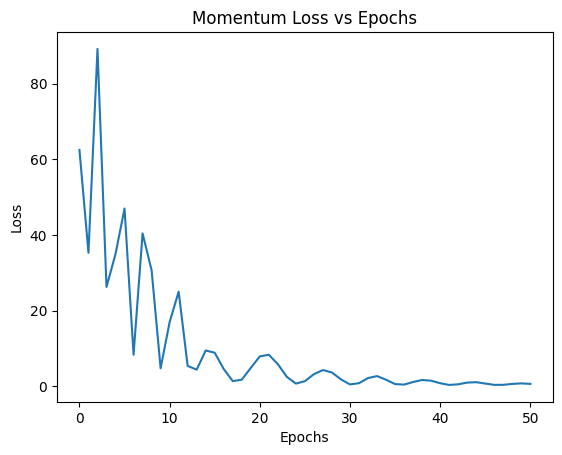

In [9]:
# Momentum convergence
plt.figure()
plt.plot(loss_mom)
plt.title('Momentum Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

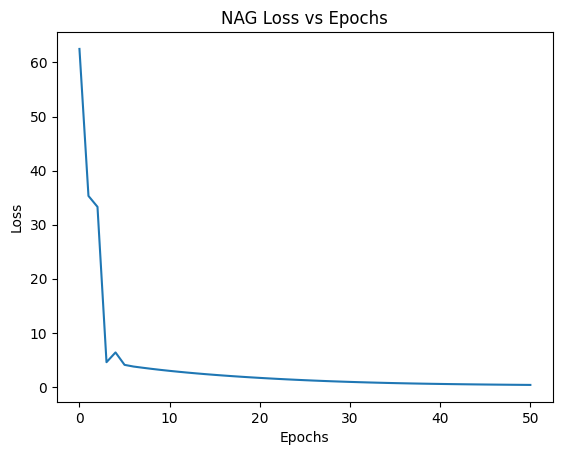

In [10]:
# NAG convergence
plt.figure()
plt.plot(loss_nag)
plt.title('NAG Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

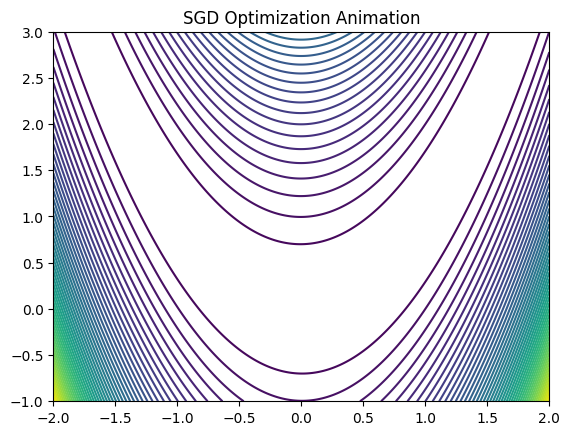

In [11]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=50)
point, = ax.plot([], [], 'o')

def update(frame):
    point.set_data(path_sgd[frame,0], path_sgd[frame,1])
    return point,

ani = FuncAnimation(fig, update, frames=len(path_sgd), interval=200)
plt.title('SGD Optimization Animation')
plt.show()

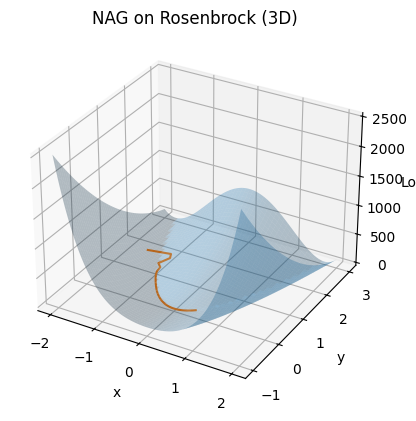

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
ax.plot(path_nag[:,0], path_nag[:,1], rosenbrock(path_nag[:,0], path_nag[:,1]))
ax.set_title('NAG on Rosenbrock (3D)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Loss')
plt.show()